# ECBM E4040 Assignment 2 - Task 1: Optimization

In this task, we introduce multiple SGD-based optimization methods. As you have learned from the last assignment, SGD is an efficient method to update parameters. However, to make SGD perform well, we need to find an appropriate learning rate and a good initial value. Otherwise, the network will get stuck if learning rate is small, or it will diverge if the learning rate is too large. In reality, since we have no prior knowledge about the training data, it is not trivial to find a good learning rate manually. Also, when the network becomes deeper, for each layer we may need to set a different learning rate, and that will again increase the development workload. Obviously, this is not a good direction. 

Another common problem is the lack of sufficient training data. This can make our training get stuck when using the naive SGD method. 

So, **how to set a good learning rate?** You are going to experiment with **SGD with momentum**, **RMSProp**, **Adam**, **Nadam** and make comparisons.

All of these optimizers are adaptive learning rate methods. Here is a useful link: http://ruder.io/optimizing-gradient-descent/.

In [4]:
# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from ecbm4040.cifar_utils import load_data

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load CIFAR 10

Here we use a small dataset with only 2500 samples to simulate "lack-of-data" situation.

In [5]:
# Load the raw CIFAR-10 data.
X_train, y_train, X_test, y_test = load_data()
X_val = X_train[:500,:]
y_val = y_train[:500]
X_train = X_train[500:2500,:]
y_train = y_train[500:2500]

mean_image = np.mean(X_train, axis=0).astype(np.float32)
X_train = X_train.astype(np.float32) - mean_image
X_val = X_val.astype(np.float32) - mean_image

# We've vectorized the data for you. That is, we flatten the 32×32×3 images into 1×3072 Numpy arrays.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)

Start downloading data...
Download complete.
Training data shape:  (2000, 3072)
Training labels shape:  (2000,)
Validation data shape:  (500, 3072)
Validation labels shape:  (500,)


## Part 1: Implement Optimizers


In [8]:
from ecbm4040.neuralnets.mlp import MLP

### Original SGD (for comparison purpose only)

In [9]:
from ecbm4040.optimizers import SGDOptim

model = MLP(input_dim=3072, hidden_dims=[100, 100], num_classes=10, l2_reg=0.0, weight_scale=1e-3)
optimizer = SGDOptim()
hist_sgd = optimizer.train(model, X_train, y_train, X_val, y_val, 
                           num_epoch=30, batch_size=200, learning_rate=2e-2, learning_decay=0.95, 
                           verbose=False, record_interval=1)

number of batches for training: 10
epoch 1: valid acc = 0.146, new learning rate = 0.019
epoch 2: valid acc = 0.152, new learning rate = 0.01805
epoch 3: valid acc = 0.148, new learning rate = 0.0171475
epoch 4: valid acc = 0.162, new learning rate = 0.016290125
epoch 5: valid acc = 0.172, new learning rate = 0.015475618749999998
epoch 6: valid acc = 0.164, new learning rate = 0.014701837812499997
epoch 7: valid acc = 0.176, new learning rate = 0.013966745921874996
epoch 8: valid acc = 0.188, new learning rate = 0.013268408625781245
epoch 9: valid acc = 0.188, new learning rate = 0.012604988194492182
epoch 10: valid acc = 0.184, new learning rate = 0.011974738784767573
epoch 11: valid acc = 0.18, new learning rate = 0.011376001845529194
epoch 12: valid acc = 0.204, new learning rate = 0.010807201753252733
epoch 13: valid acc = 0.22, new learning rate = 0.010266841665590096
epoch 14: valid acc = 0.24, new learning rate = 0.009753499582310591
epoch 15: valid acc = 0.24, new learning rate

### SGD + Momentum


In [10]:
from ecbm4040.optimizers import SGDmomentumOptim

model = MLP(input_dim=3072, hidden_dims=[100, 100], num_classes=10, l2_reg=0.0, weight_scale=1e-3)
optimizer = SGDmomentumOptim(model, momentum=0.8)
hist_sgd_momentum = optimizer.train(model, X_train, y_train, X_val, y_val,
                                    num_epoch=30, batch_size=200, learning_rate=1e-2, learning_decay=0.95, 
                                    verbose=False, record_interval=1)

number of batches for training: 10
epoch 1: valid acc = 0.15, new learning rate = 0.0095
epoch 2: valid acc = 0.16, new learning rate = 0.009025
epoch 3: valid acc = 0.162, new learning rate = 0.00857375
epoch 4: valid acc = 0.172, new learning rate = 0.0081450625
epoch 5: valid acc = 0.188, new learning rate = 0.007737809374999999
epoch 6: valid acc = 0.182, new learning rate = 0.007350918906249998
epoch 7: valid acc = 0.208, new learning rate = 0.006983372960937498
epoch 8: valid acc = 0.236, new learning rate = 0.006634204312890623
epoch 9: valid acc = 0.284, new learning rate = 0.006302494097246091
epoch 10: valid acc = 0.254, new learning rate = 0.005987369392383786
epoch 11: valid acc = 0.262, new learning rate = 0.005688000922764597
epoch 12: valid acc = 0.258, new learning rate = 0.005403600876626367
epoch 13: valid acc = 0.282, new learning rate = 0.005133420832795048
epoch 14: valid acc = 0.286, new learning rate = 0.0048767497911552955
epoch 15: valid acc = 0.3, new learning

### RMSprop


In [11]:
from ecbm4040.optimizers import RMSpropOptim

model = MLP(input_dim=3072, hidden_dims=[100, 100], num_classes=10, l2_reg=0.0, weight_scale=1e-3)
optimizer = RMSpropOptim(model)
hist_rmsprop = optimizer.train(model, X_train, y_train, X_val, y_val, 
                               num_epoch=30, batch_size=200, learning_rate=1e-3, learning_decay=0.95, 
                               verbose=False, record_interval=1)

number of batches for training: 10
epoch 1: valid acc = 0.14, new learning rate = 0.00095
epoch 2: valid acc = 0.172, new learning rate = 0.0009025
epoch 3: valid acc = 0.218, new learning rate = 0.000857375
epoch 4: valid acc = 0.26, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.318, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.33, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.328, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.33, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.318, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.322, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.336, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.35, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.346, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.346, new learning rate = 0.00048767497911552944
epoch 15: valid acc =

### Adam


In [12]:
from ecbm4040.optimizers import AdamOptim

model = MLP(input_dim=3072, hidden_dims=[100, 100], num_classes=10, l2_reg=0.0, weight_scale=1e-3)
optimizer = AdamOptim(model)
hist_adam = optimizer.train(model, X_train, y_train, X_val, y_val, 
                            num_epoch=30, batch_size=200, learning_rate=1e-3, learning_decay=0.95, 
                            verbose=False, record_interval=1)

number of batches for training: 10
epoch 1: valid acc = 0.16, new learning rate = 0.00095
epoch 2: valid acc = 0.18, new learning rate = 0.0009025
epoch 3: valid acc = 0.2, new learning rate = 0.000857375
epoch 4: valid acc = 0.246, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.23, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.26, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.276, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.27, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.274, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.294, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.282, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.284, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.274, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.242, new learning rate = 0.00048767497911552944
epoch 15: valid acc = 0

### Nadam


In [13]:
from ecbm4040.optimizers import NadamOptim

model = MLP(input_dim=3072, hidden_dims=[100, 100], num_classes=10, l2_reg=0.0, weight_scale=1e-3)
optimizer = NadamOptim(model)
hist_nadam = optimizer.train(model, X_train, y_train, X_val, y_val, 
                             num_epoch=30, batch_size=200, learning_rate=5e-4, learning_decay=0.95, 
                             verbose=False, record_interval=1)

number of batches for training: 10
epoch 1: valid acc = 0.172, new learning rate = 0.000475
epoch 2: valid acc = 0.174, new learning rate = 0.00045125
epoch 3: valid acc = 0.176, new learning rate = 0.0004286875
epoch 4: valid acc = 0.184, new learning rate = 0.00040725312499999993
epoch 5: valid acc = 0.18, new learning rate = 0.0003868904687499999
epoch 6: valid acc = 0.182, new learning rate = 0.0003675459453124999
epoch 7: valid acc = 0.18, new learning rate = 0.00034916864804687486
epoch 8: valid acc = 0.232, new learning rate = 0.0003317102156445311
epoch 9: valid acc = 0.25, new learning rate = 0.0003151247048623045
epoch 10: valid acc = 0.236, new learning rate = 0.00029936846961918924
epoch 11: valid acc = 0.24, new learning rate = 0.00028440004613822977
epoch 12: valid acc = 0.254, new learning rate = 0.00027018004383131826
epoch 13: valid acc = 0.244, new learning rate = 0.00025667104163975234
epoch 14: valid acc = 0.266, new learning rate = 0.00024383748955776472
epoch 15: 

## Part 2: Comparison


In [14]:
loss_hist_sgd, train_acc_hist_sgd, val_acc_hist_sgd = hist_sgd
loss_hist_momentum, train_acc_hist_momentum, val_acc_hist_momentum = hist_sgd_momentum
loss_hist_rmsprop, train_acc_hist_rmsprop, val_acc_hist_rmsprop = hist_rmsprop
loss_hist_adam, train_acc_hist_adam, val_acc_hist_adam = hist_adam
loss_hist_nadam, train_acc_hist_nadam, val_acc_hist_nadam = hist_nadam

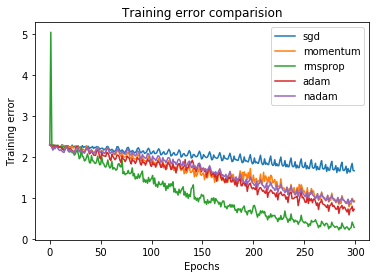

In [19]:
# Plot training error curve of optimizers
plt.plot(loss_hist_sgd, label="sgd")
plt.plot(loss_hist_momentum, label="momentum")
plt.plot(loss_hist_rmsprop, label="rmsprop")
plt.plot(loss_hist_adam, label="adam")
plt.plot(loss_hist_nadam, label="nadam")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Training error")
plt.title("Training error comparision")
plt.savefig("images/opt_training.png")
plt.show()

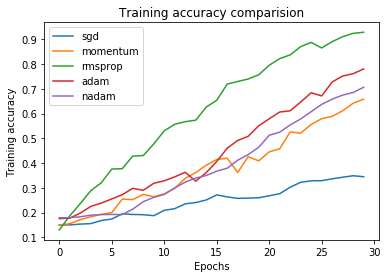

In [20]:
# Plot training accuracy curve of optimizers
plt.plot(train_acc_hist_sgd, label="sgd")
plt.plot(train_acc_hist_momentum, label="momentum")
plt.plot(train_acc_hist_rmsprop, label="rmsprop")
plt.plot(train_acc_hist_adam, label="adam")
plt.plot(train_acc_hist_nadam, label="nadam")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Training accuracy")
plt.title("Training accuracy comparision")
plt.savefig("images/opt_accuracy.png")
plt.show()

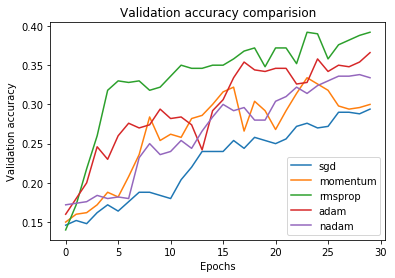

In [21]:
# Plot validation accuracy curve of optimizers
plt.plot(val_acc_hist_sgd, label="sgd")
plt.plot(val_acc_hist_momentum, label="momentum")
plt.plot(val_acc_hist_rmsprop, label="rmsprop")
plt.plot(val_acc_hist_adam, label="adam")
plt.plot(val_acc_hist_nadam, label="nadam")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Validation accuracy")
plt.title("Validation accuracy comparision")
plt.savefig("images/opt_validation_accuracy.png")
plt.show()